# MLR: Predicting Final Grade

### Importing Libraries

In [420]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import pickle

### Reading the CSV File

In [421]:
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Checking Linearity

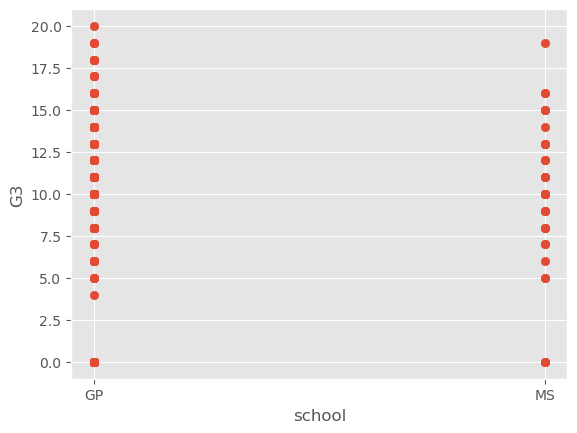

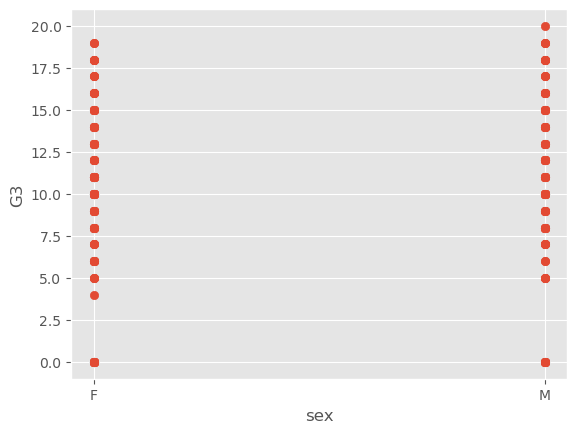

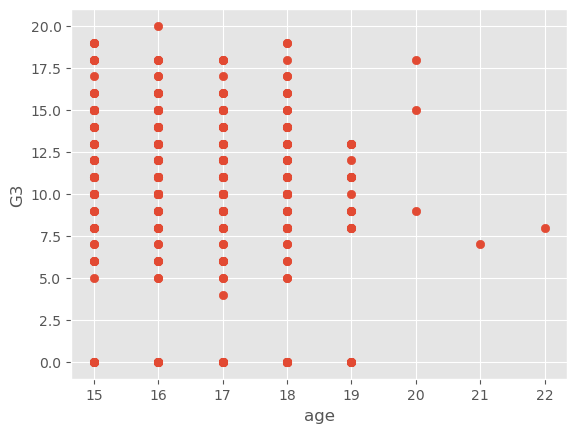

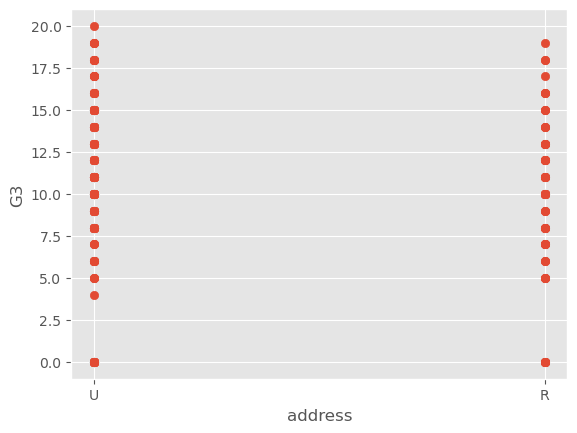

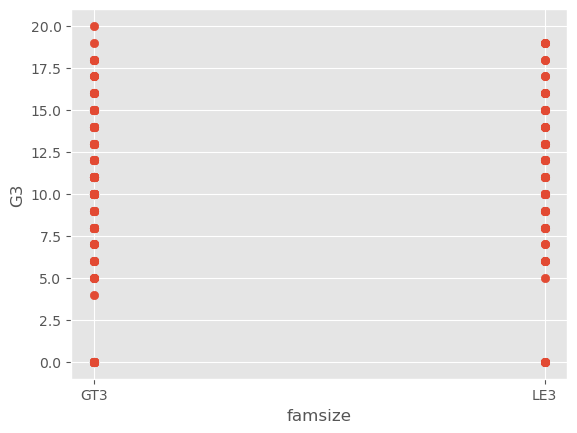

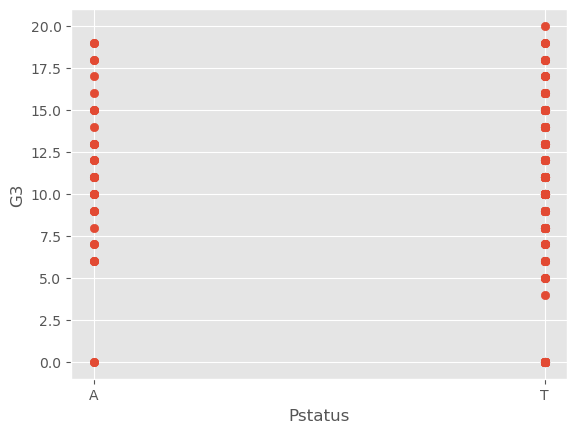

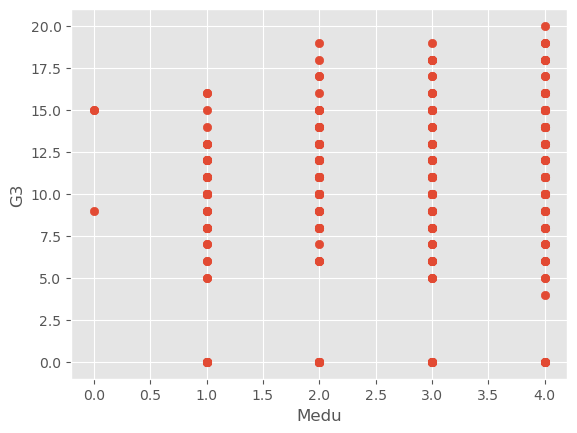

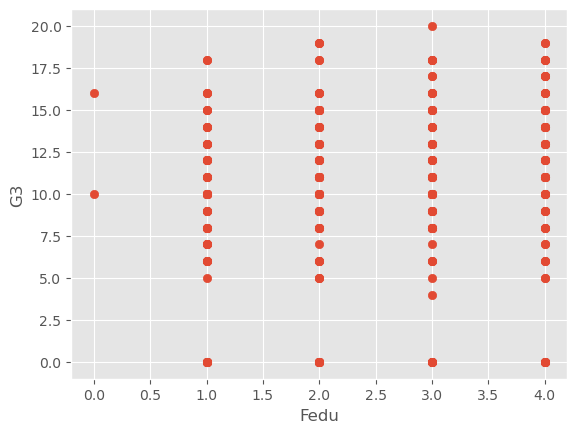

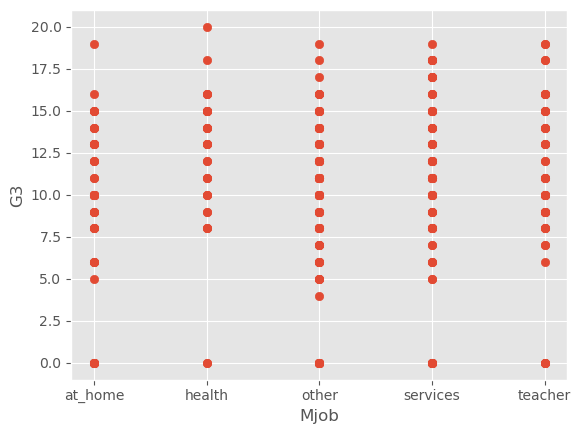

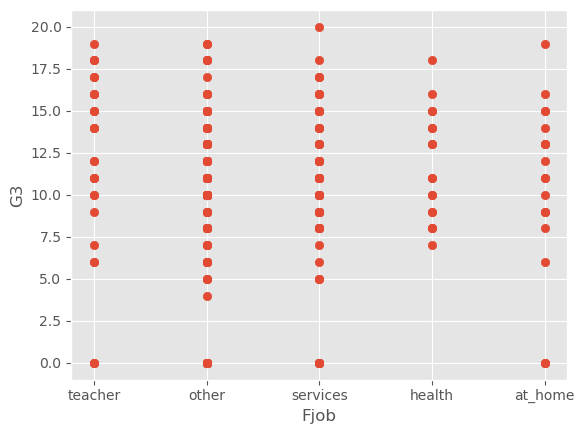

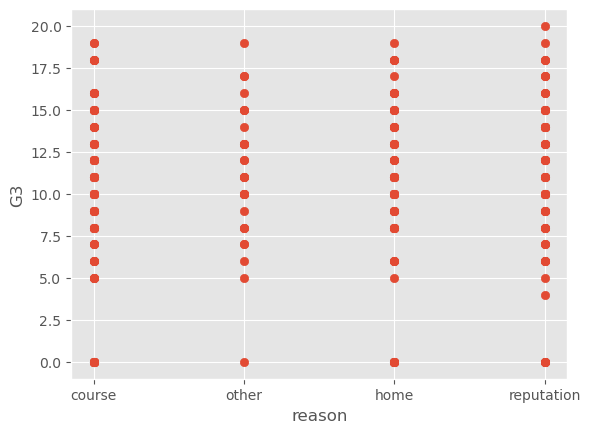

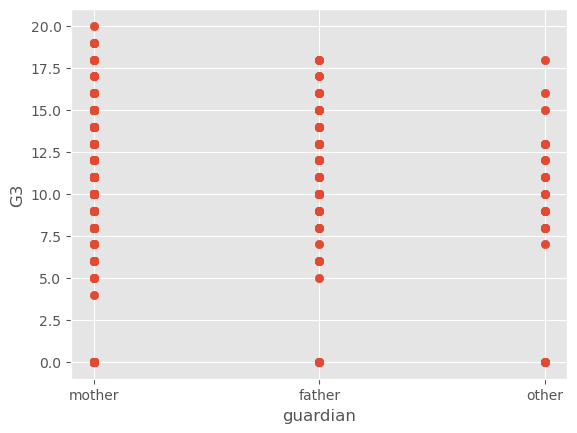

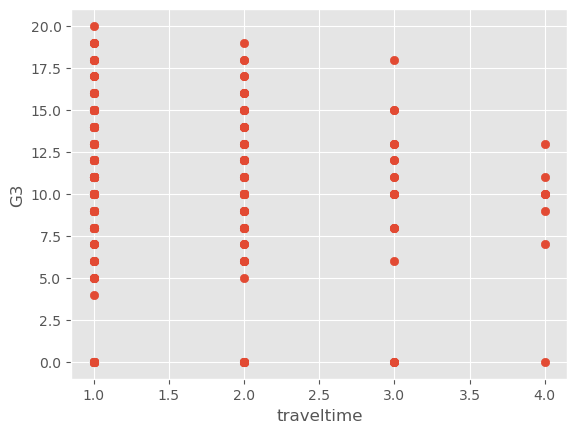

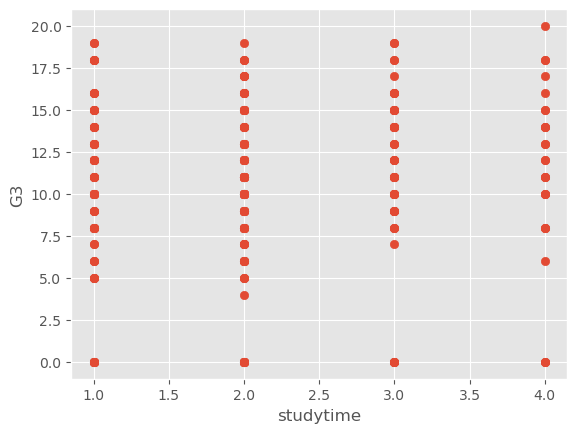

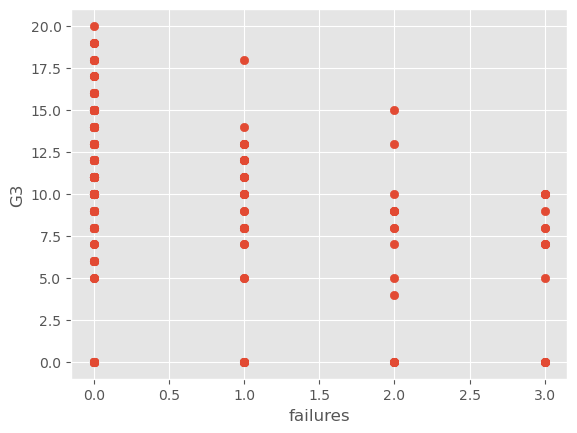

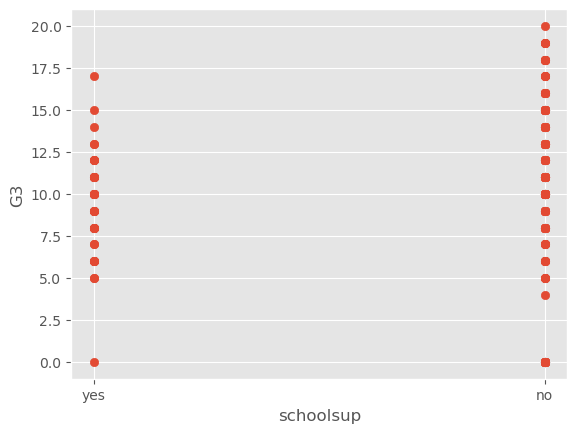

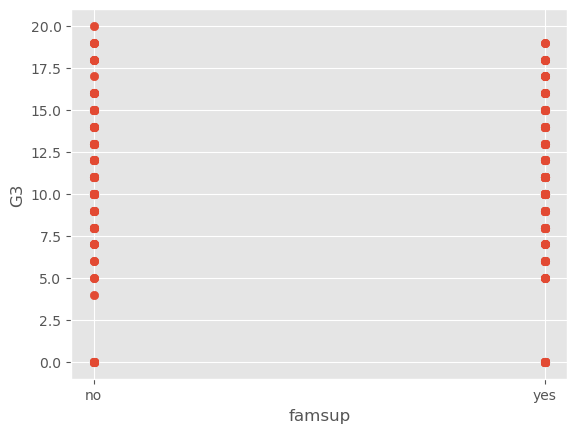

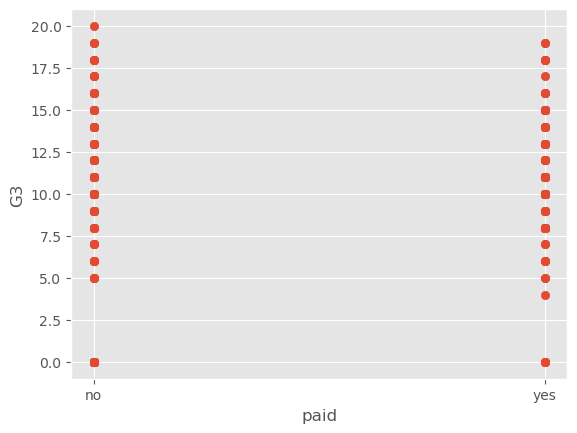

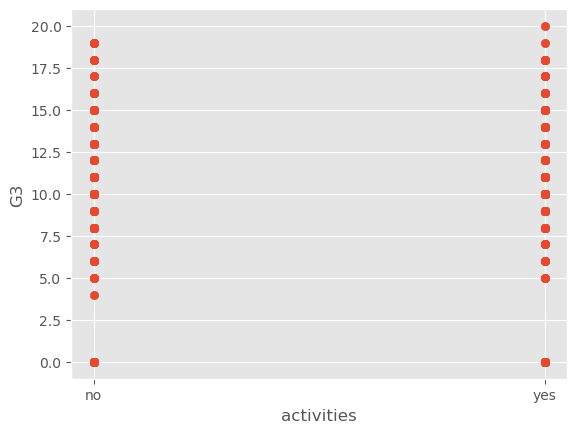

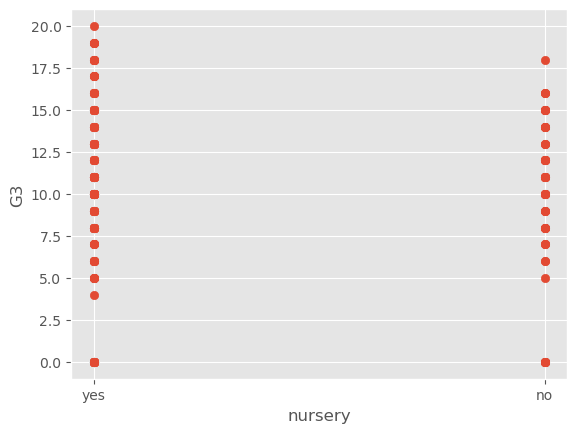

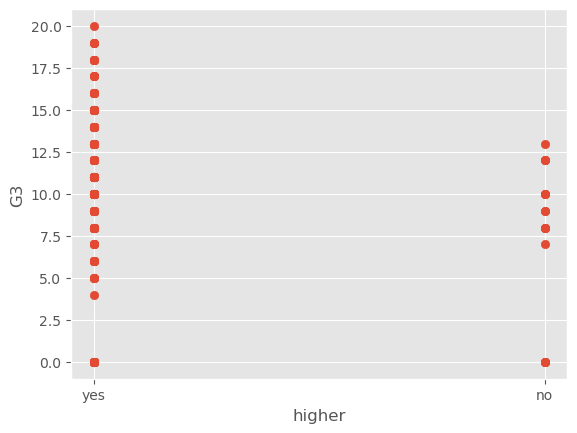

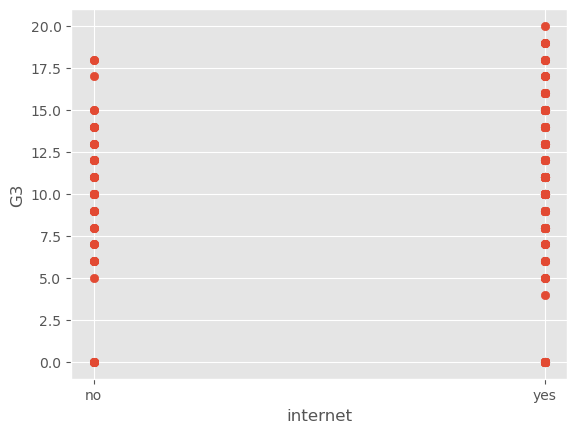

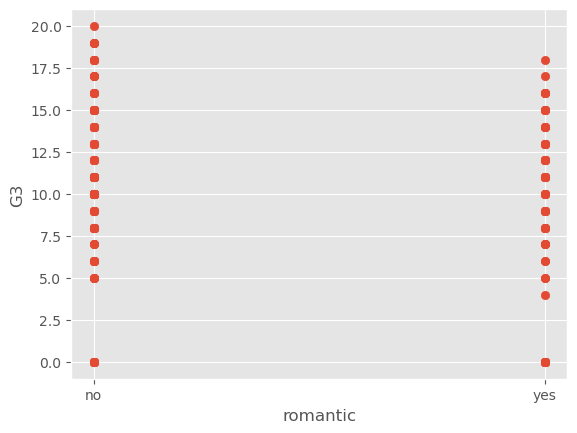

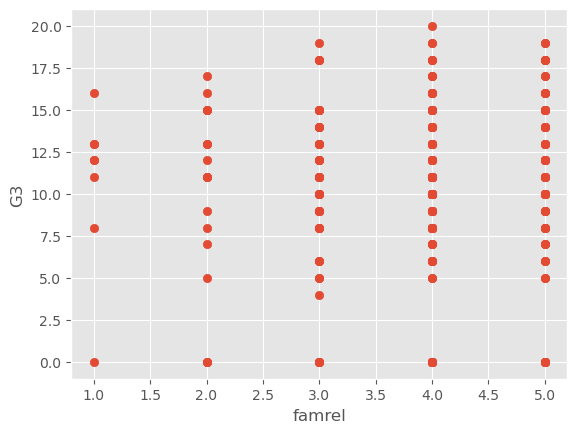

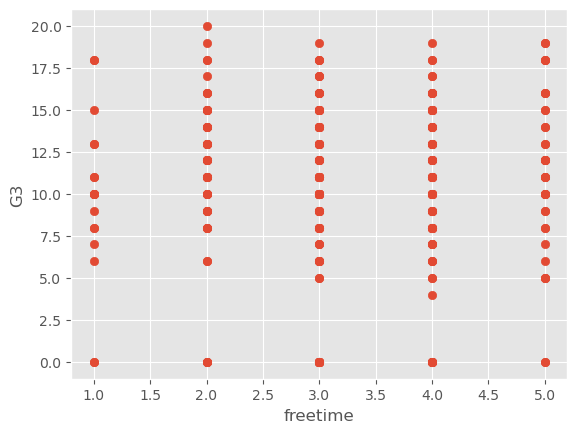

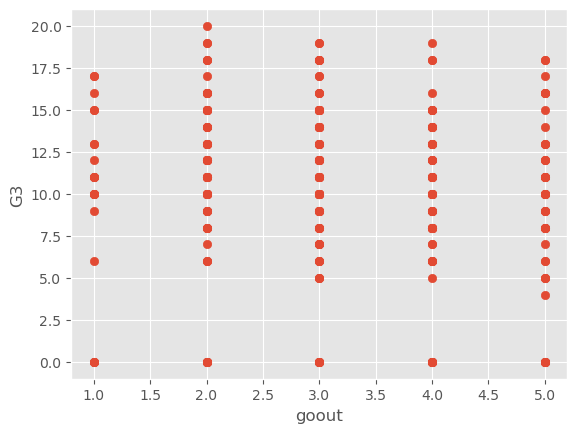

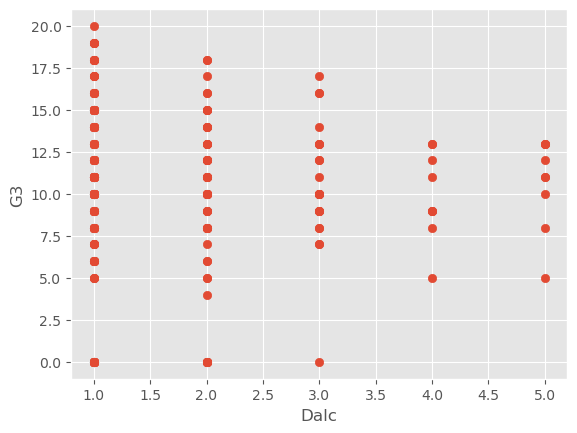

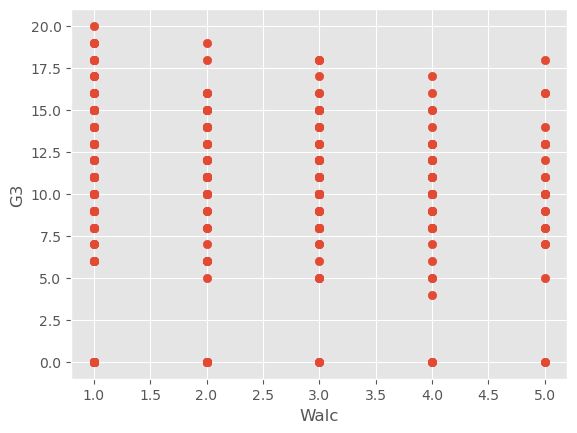

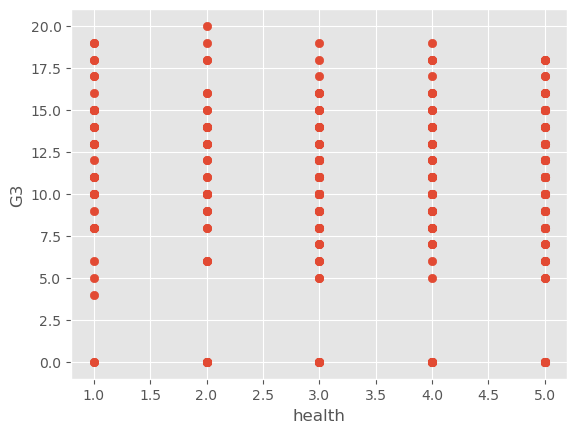

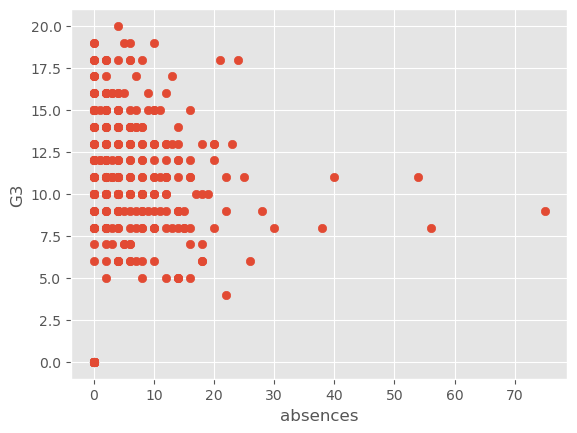

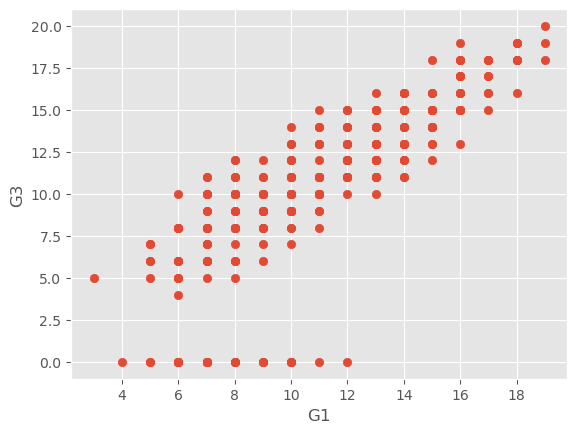

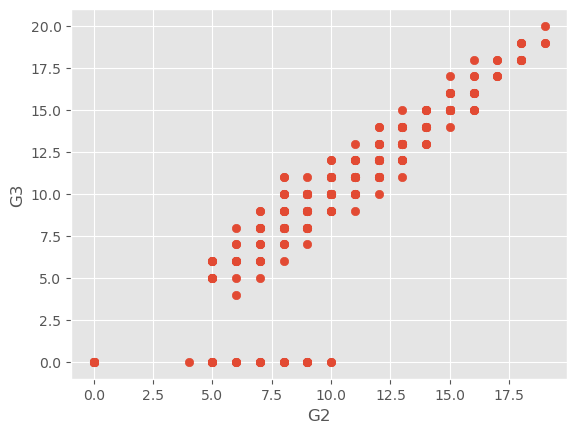

In [422]:
for column in data:
    if column != "G3":
        plt.scatter(data[column], data['G3'])
        plt.xlabel(column)
        plt.ylabel("G3")
        plt.show()

### Preprocessing Data

Here, we are transforming all categorical data into a numerical format since LR only works on continous variables. This part is not necessary to do here (hence why it's commented out) since we are not training our model on any categorical data.

In [423]:
# from sklearn import preprocessing

# encoders = {}

# for column in data:
#     if data[column].dtype != np.int64:
#         le = preprocessing.LabelEncoder()
#         le.fit(data[column].values)
#         data[column] = le.transform(data[column].values)
#         encoders[column] = le

# # to decode the data later, do the following:

# # for column in encoders:
# #     le = encoders[column]
# #     data[column] = le.inverse_transform(data[column].values)

### Selecting Columns

In [424]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [425]:
data = data[["G1", "G2", "failures", "absences", "studytime", "G3"]]

### Defining Attributes and Label

In [426]:
toPredict = "G3"

X = np.array(data.drop([toPredict], axis=1))
y = np.array(data[toPredict])

### Training the Model

In [427]:
from sklearn import model_selection 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

linear = linear_model.LinearRegression().fit(X_train, y_train)

y_pred = linear.predict(X_test)

### Evaluating Results

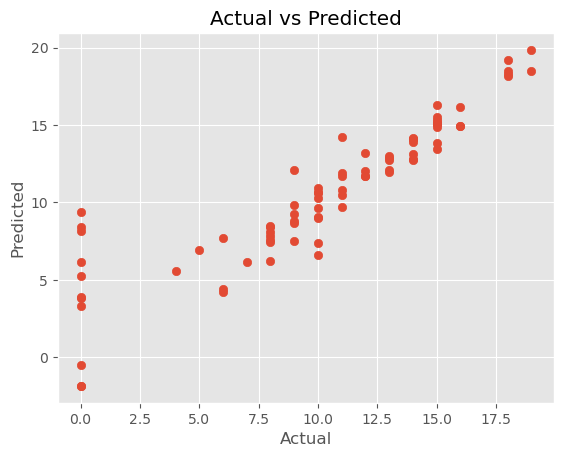

In [430]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [431]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.8044217535727907
